In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time
import xesmf as xe


In [24]:
from scipy.interpolate import griddata
from scipy.interpolate import interp2d


In [25]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [26]:
dir_llc270 = '/central/groups/oceanphysics/anirban/llc270_2008_2009'
ds_llc270 =  xmitgcm.open_mdsdataset(dir_llc270,iters='all',geometry='llc',default_dtype='>f4',
                                    delta_t=1200, ref_date='1992-1-1 0:0:0').chunk({'time': 1})

In [27]:
ds_llc270

<xarray.Dataset>
Dimensions:   (face: 13, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 25)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC        (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    YC        (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270

In [28]:
ds_llc270 = ds_llc270.isel(time=slice(0,24))
ds_llc270

<xarray.Dataset>
Dimensions:   (face: 13, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 24)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC        (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    YC        (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270

In [29]:
ds_llc270.time

<xarray.DataArray 'time' (time: 24)>
array(['2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-05-01T00:00:00.000000000', '2008-06-01T00:00:00.000000000',
       '2008-07-01T00:00:00.000000000', '2008-08-01T00:00:00.000000000',
       '2008-09-01T00:00:00.000000000', '2008-10-01T00:00:00.000000000',
       '2008-11-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-03-01T00:00:00.000000000', '2009-04-01T00:00:00.000000000',
       '2009-05-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-08-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    iter     (time) int64 dask.array<shape=

In [30]:
sst_2008_12 = ds_llc270['THETA'].sel(k=0, time='2008-12')

sst_2008_12

<xarray.DataArray 'THETA' (time: 1, face: 13, j: 270, i: 270)>
dask.array<shape=(1, 13, 270, 270), dtype=float32, chunksize=(1, 1, 270, 270)>
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
    k        int64 0
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    YC       (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    CS       (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    SN       (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    Z        >f4 dask.array<shape=(), chunksize=()>
    rA       (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    Depth    (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    drF      >f4 dask.array

<Figure size 1440x720 with 0 Axes>

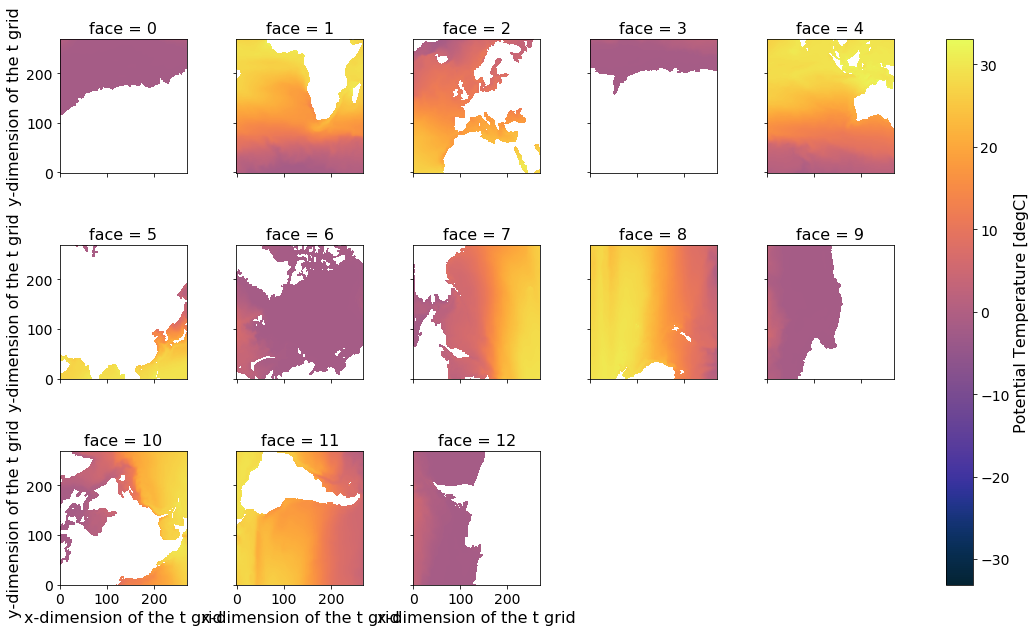

In [31]:
plt.figure(figsize=(20,10))
sst_2008_12.where(sst_2008_12.hFacC).plot(col='face', col_wrap=5, cmap=cmocean.cm.thermal)

In [32]:
sst1 = sst_2008_12.where(sst_2008_12.hFacC).sel(face=1).values.reshape(270,270)
sst2 = sst_2008_12.where(sst_2008_12.hFacC).sel(face=2).values.reshape(270,270)

sst10 = sst_2008_12.where(sst_2008_12.hFacC).sel(face=10).values.reshape(270,270)
sst10 = np.rot90(sst10,1)
sst11 = sst_2008_12.where(sst_2008_12.hFacC).sel(face=11).values.reshape(270,270)
sst11 = np.rot90(sst11,1)


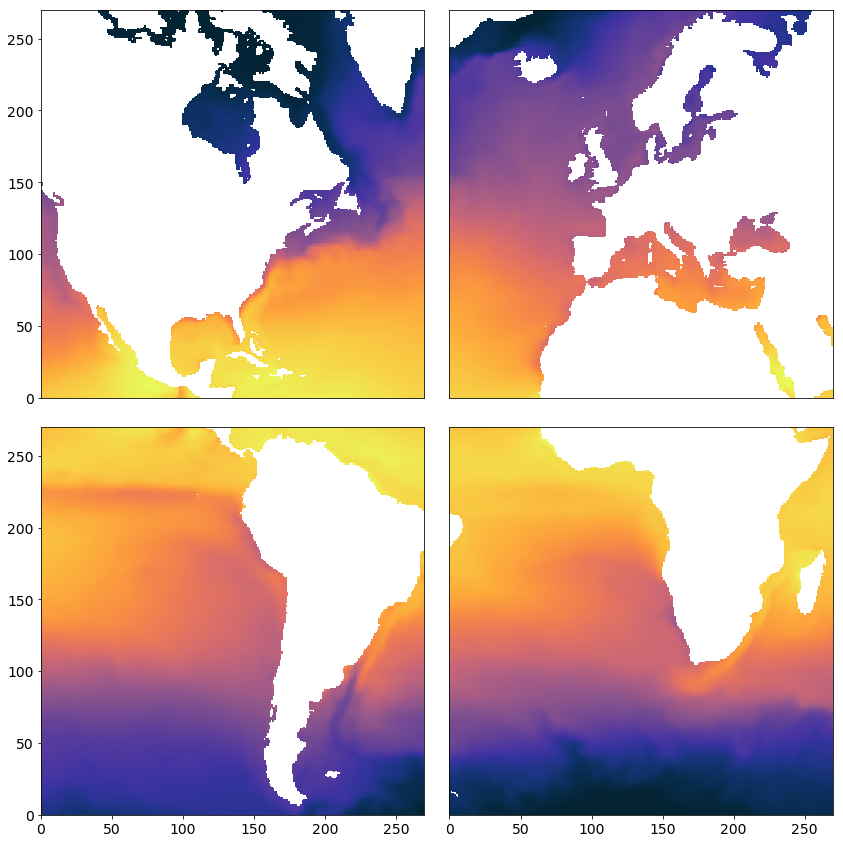

In [33]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.pcolormesh(sst10, cmap=cmocean.cm.thermal)
plt.xticks([])
plt.subplot(223)
plt.pcolormesh(sst11, cmap=cmocean.cm.thermal)

plt.subplot(222)
plt.pcolormesh(sst2, cmap=cmocean.cm.thermal)
plt.xticks([])
plt.yticks([])
plt.subplot(224)
plt.pcolormesh(sst1, cmap=cmocean.cm.thermal)
plt.yticks([])
plt.tight_layout()


In [34]:
XCfull = np.zeros((270,540))
XCfull[:,0:270] = np.rot90(ds_llc270.XC.sel(face=10).values)
XCfull[:,270:540] = ds_llc270.XC.sel(face=2).values

YCfull = np.zeros((270,540))
YCfull[:,0:270] = np.rot90(ds_llc270.YC.sel(face=10).values)
YCfull[:,270:540] = ds_llc270.YC.sel(face=2).values

XGfull = np.zeros((270,540))
XGfull[:,0:270] = np.rot90(ds_llc270.XG.sel(face=10).values)
XGfull[:,270:540] = ds_llc270.XG.sel(face=2).values

YGfull = np.zeros((270,540))
YGfull[:,0:270] = np.rot90(ds_llc270.YG.sel(face=10).values)
YGfull[:,270:540] = ds_llc270.YG.sel(face=2).values


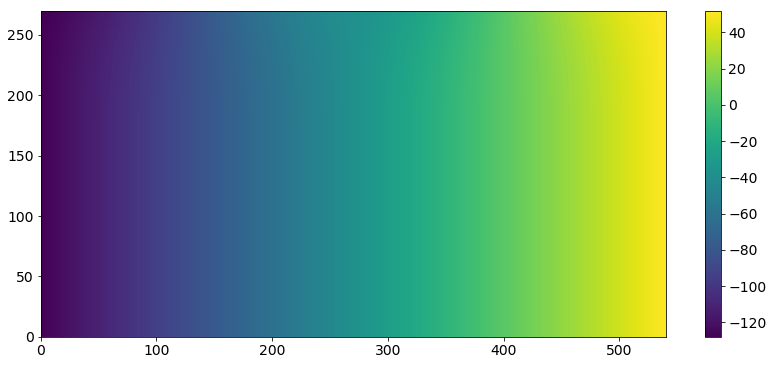

In [35]:
plt.pcolormesh(XCfull);plt.colorbar()

In [36]:
fold = open('/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/delYFile', 'rb')
delYold1815 = np.fromfile(fold, '>f4')
delYold1815.shape

(532,)

In [37]:
ds0 = xmitgcm.open_mdsdataset('/central/groups/oceanphysics/anirban/ll181502/grid_ll1815',iters=None,default_dtype='>f4')
ds0

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/ll181502/grid_ll1815. Using default version.
  "in %s. Using default version." % data_dir)


<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * YC       (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG       (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dxG      (YG, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dyG      (YC, XG) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    Depth    (YC, XC) >f4 dask.array<shape

In [38]:
idy = (np.where((YGfull[:,-2]>=26.) & (YGfull[:,-2]<44))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.) & (XGfull[2,:]<-5))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
XC = XCsmall[idy]
YC = YCsmall[:,idx]
XG = XGsmall[idy]
YG = YGsmall[:,idx]
XC.shape, YC.shape, XG.shape, YG.shape


((72, 228), (72, 228), (72, 228), (72, 228))

In [39]:
Saltfull = np.zeros((24,50,270,540))
Saltfull[:,:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).SALT.sel(face=10).values, 1, (2,3))
Saltfull[:,:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).SALT.sel(face=2).values
Salt = Saltfull[:,:,idy][:,:,:,idx]

Thetafull = np.ma.zeros((24,50,270,540))
Thetafull[:,:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).THETA.sel(face=10).values, 1, (2,3))
Thetafull[:,:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).THETA.sel(face=2).values
Theta = Thetafull[:,:,idy][:,:,:,idx]

Ufull = np.zeros((24,50,270,540))
#Ufull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacW).isel(time=0).UVELMASS.sel(face=10).values, 1, (1,2))
Ufull[:,:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacS).VVELMASS.sel(face=10).values, 1, (2,3))
Ufull[:,:,:,270:540] =  ds_llc270.where(ds_llc270.hFacW).UVELMASS.sel(face=2).values
U = Ufull[:,:,idy][:,:,:,idx]

Vfull = np.zeros((24,50,270,540))
#Vfull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacS).isel(time=0).VVELMASS.sel(face=10).values, 1, (1,2))
Vfull[:,:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacW).UVELMASS.sel(face=10).values*-1, 1, (2,3))
Vfull[:,:,:,270:540] =  ds_llc270.where(ds_llc270.hFacS).VVELMASS.sel(face=2).values
V = Vfull[:,:,idy][:,:,:,idx]

depthfull = np.zeros((270,540))
depthfull[:,0:270] = np.rot90(ds_llc270.Depth.sel(face=10).values)
depthfull[:,270:540] = ds_llc270.Depth.sel(face=2).values
depth = depthfull[idy,:][:,idx]

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  

In [40]:
dxcfull = np.zeros((270,540))
dxcfull[:,0:270] = np.rot90(ds_llc270.dyC.sel(face=10).values)
#dxcfull[:,0:270] = ds_llc270.dxC.sel(face=10).values
dxcfull[:,270:540] = ds_llc270.dxC.sel(face=2).values
dxc = dxcfull[idy,:][:,idx]

dxgfull = np.zeros((270,540))
dxgfull[:,0:270] = np.rot90(ds_llc270.dyG.sel(face=10).values)
#dxgfull[:,0:270] = ds_llc270.dxG.sel(face=10).values
dxgfull[:,270:540] = ds_llc270.dxG.sel(face=2).values
dxg = dxgfull[idy,:][:,idx]

dycfull = np.zeros((270,540))
dycfull[:,0:270] = np.rot90(ds_llc270.dxC.sel(face=10).values)
#dycfull[:,0:270] = ds_llc270.dyC.sel(face=10).values
dycfull[:,270:540] = ds_llc270.dyC.sel(face=2).values
dyc = dycfull[idy,:][:,idx]

dygfull = np.zeros((270,540))
dygfull[:,0:270] = np.rot90(ds_llc270.dxG.sel(face=10).values)
dygfull[:,270:540] = ds_llc270.dyG.sel(face=2).values
dyg = dygfull[idy,:][:,idx]

In [41]:
hFacCfull = np.zeros((50,270,540))
hFacCfull[:,:,0:270] =  np.rot90(ds_llc270.hFacC.sel(face=4).values, 1, (1,2))
hFacCfull[:,:,270:540] =  ds_llc270.hFacC.sel(face=1).values
hFacC = hFacCfull[:,idy][:,:,idx]

hFacSfull = np.zeros((50,270,540))
hFacSfull[:,:,0:270] =  np.rot90(ds_llc270.hFacS.sel(face=4).values, 1, (1,2))
hFacSfull[:,:,270:540] =  ds_llc270.hFacS.sel(face=1).values
hFacS = hFacSfull[:,idy][:,:,idx]

hFacWfull = np.zeros((50,270,540))
hFacWfull[:,:,0:270] =  np.rot90(ds_llc270.hFacW.sel(face=4).values, 1, (1,2))
hFacWfull[:,:,270:540] =  ds_llc270.hFacW.sel(face=1).values
hFacW = hFacWfull[:,idy][:,:,idx]



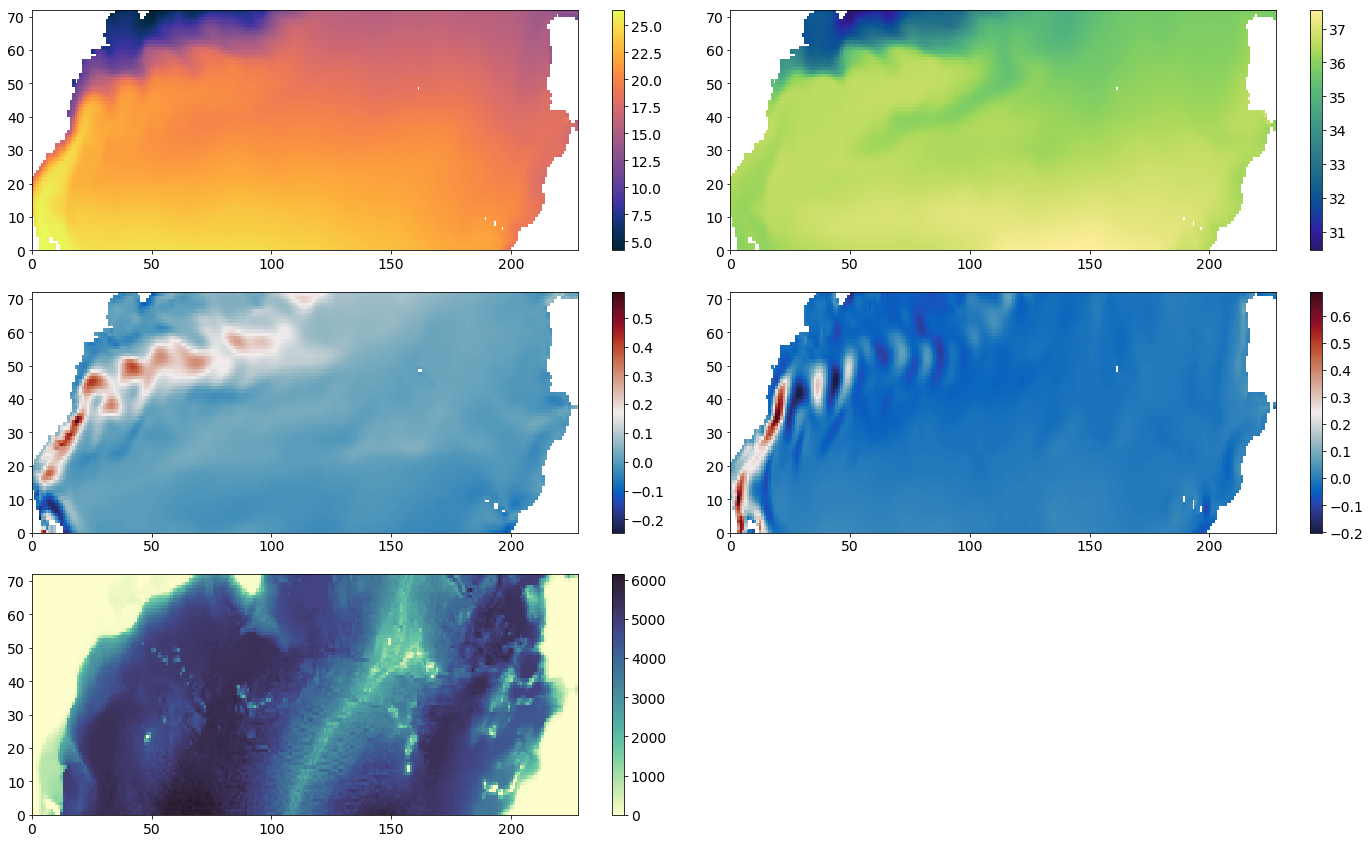

In [42]:
plt.figure(figsize=(20,12))
plt.subplot(321)
plt.pcolormesh(Theta[0,0], cmap=cmocean.cm.thermal);plt.colorbar()
plt.subplot(322)
plt.pcolormesh(Salt[0,0], cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(323)
plt.pcolormesh(U[0,0], cmap=cmocean.cm.balance);plt.colorbar()
plt.subplot(324)
plt.pcolormesh(V[0,0], cmap=cmocean.cm.balance);plt.colorbar()
plt.subplot(325)
plt.pcolormesh(depth, cmap=cmocean.cm.deep);plt.colorbar()
plt.tight_layout()

In [43]:
xc_fine = ds0.XC.values
yc_fine = ds0.YC.values
xg_fine = ds0.XG.values
yg_fine = ds0.YG.values

z_fine = ds0.Z.values

xc = XC[10]
yc = YC[:,10]

xg = XG[10]
yg = YG[:,10]


z = ds_llc270.Z.values

In [44]:
f_u =  interp2d(xc,yc, depth, kind='linear')
depth_u = f_u(xg, yc)
f_v =  interp2d(xc,yc, depth, kind='linear')
depth_v = f_v(xc, yg)

In [45]:
def fill_land(dataarray, x,y):
    xx,yy = np.meshgrid(x,y)
    assert xx.shape == dataarray.shape
    assert yy.shape == dataarray.shape
    data = dataarray.ravel()[~np.isnan(dataarray.ravel())]
    xpts = xx.ravel()[~np.isnan(dataarray.ravel())]
    ypts = yy.ravel()[~np.isnan(dataarray.ravel())]
    
    
    data_filled = griddata((xpts, ypts), data, (xx,yy), method='nearest',rescale=True)
    return data_filled

In [24]:
Salt.shape

(24, 50, 72, 228)

In [46]:
%%time 
Salt_noland = np.zeros_like(Salt)
Theta_noland = np.zeros_like(Salt)
U_noland = np.zeros_like(Salt)
V_noland = np.zeros_like(Salt)

for i in range(Salt.shape[0]):
    for j in range(Salt.shape[1]):
        
        Salt_noland[i,j] = fill_land(Salt[i,j],xc,yc)
        Theta_noland[i,j] = fill_land(Theta[i,j],xc,yc)
        U_noland[i,j] = fill_land(U[i,j],xg,yc)
        V_noland[i,j] = fill_land(V[i,j],xc,yg)
    

CPU times: user 1min 48s, sys: 816 ms, total: 1min 48s
Wall time: 1min 50s


In [25]:
def nearest_c_to_f(dataarray, x,y,x_fine,y_fine):
    xx,yy = np.meshgrid(x,y)
    xx_fine,yy_fine = np.meshgrid(x_fine,y_fine)
    assert xx.shape == dataarray.shape
    assert yy.shape == dataarray.shape
    data = dataarray.ravel()[~np.isnan(dataarray.ravel())]
    xpts = xx.ravel()[~np.isnan(dataarray.ravel())]
    ypts = yy.ravel()[~np.isnan(dataarray.ravel())]
    
    
    data_filled = griddata((xpts, ypts), data, (xx_fine,yy_fine), method='nearest',rescale=True)
    return data_filled

# Create data for fake calendar year #

The calendar year looks like at Jan01-2009--Jun30-2009, Jul01-2008--Dec31-2008.
So essentially take the 1st six months of 2nd year (2009) and last six months of 1st year (2008).
But we also need one month before and after, So essentially our timeseries will have be 
08Dec,09{Jan,Feb,Mar,Apr,May,Jun},08{Jul,Aug,Sep,Oct,Nov,Dec},09{Jan}

In [19]:
# SKIP this for now, since we don't have the correct data, will do in another notebook

In [47]:
Salt_noland.shape

(24, 50, 72, 228)

In [49]:
Salt_wet = np.zeros_like(Salt_noland[:12])
Theta_wet = np.zeros_like(Salt_noland[:12])
U_wet = np.zeros_like(Salt_noland[:12])
V_wet = np.zeros_like(Salt_noland[:12])


Salt_wet[:6] = Salt_noland[12:18]
Salt_wet[6:12] = Salt_noland[6:12]

Theta_wet[:6] = Theta_noland[12:18]
Theta_wet[6:12] = Theta_noland[6:12]

U_wet[:6] = U_noland[12:18]
U_wet[6:12] = U_noland[6:12]

V_wet[:6] = V_noland[12:18]
V_wet[6:12] = V_noland[6:12]

Salt_fake = Salt[:12]
Theta_fake = Theta[:12]
U_fake = U[:12]
V_fake = V[:12]
Salt_fake[:6] = Salt[12:18]
Theta_fake[:6] = Theta[12:18]
U_fake[:6] = U[12:18]
V_fake[:6] = V[12:18]

In [53]:
times = ds_llc270.time.values[0:12]

In [55]:
salt = xr.DataArray(Salt_fake, coords={'time':times,'Z': z,'YC': yc, 'XC': xc},
             dims=['time','Z','YC','XC'])
theta = xr.DataArray(Theta_fake, coords={'time':times,'Z': z,'YC': yc, 'XC': xc},
             dims=['time','Z','YC','XC'])
u = xr.DataArray(U_fake, coords={'time':times,'Z': z,'YC': yc, 'XG': xg},
             dims=['time','Z','YC','XG'])
v = xr.DataArray(V_fake, coords={'time':times,'Z': z,'YG': yg, 'XC': xc},
             dims=['time','Z','YG','XC'])

hfacC = xr.DataArray(hFacC, coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
hfacW = xr.DataArray(hFacW, coords={'Z': z,'YC': yc, 'XG': xg},
             dims=['Z','YC','XG'])
hfacS = xr.DataArray(hFacS, coords={'Z': z,'YG': yg, 'XC': xc},
             dims=['Z','YG','XC'])


salt_noland = xr.DataArray(Salt_wet, coords={'time':times,'Z': z,'YC': yc, 'XC': xc},
             dims=['time','Z','YC','XC'])
theta_noland = xr.DataArray(Theta_wet, coords={'time':times,'Z': z,'YC': yc, 'XC': xc},
             dims=['time','Z','YC','XC'])
u_noland = xr.DataArray(U_wet, coords={'time':times,'Z': z,'YC': yc, 'XG': xg},
             dims=['time','Z','YC','XG'])
v_noland = xr.DataArray(V_wet, coords={'time':times,'Z': z,'YG': yg, 'XC': xc},
             dims=['time','Z','YG','XC'])

dep = xr.DataArray(depth*-1, coords={'YC': yc, 'XC': xc}, dims=['YC','XC'])
dep_u = xr.DataArray(depth_u*-1, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dep_v = xr.DataArray(depth_v*-1, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])

dxC = xr.DataArray(dxc, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dyG = xr.DataArray(dyg, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dxG = xr.DataArray(dxg, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])
dyC = xr.DataArray(dyc, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])

ds_c = xr.Dataset({'salt': salt,
                   'theta': theta,
                   'U': u,
                   'V': v,
                   'salt_l': salt_noland,
                   'theta_l': theta_noland,
                   'U_l': u_noland,
                   'V_l': v_noland,
                   'depth': dep, 'depth_u': dep_u, 'depth_v': dep_v, 
                   })
ds_c.coords['hFacC'] = hfacC
ds_c.coords['hFacW'] = hfacW
ds_c.coords['hFacS'] = hfacS
ds_c.coords['dxC'] = dxC
ds_c.coords['dxG'] = dxG
ds_c.coords['dyC'] = dyC
ds_c.coords['dyG'] = dyG
ds_c.coords['dZ'] = xr.DataArray(ds_llc270.drF.values, coords={'Z':ds_c.Z.values}, dims = ['Z'])

ds_c

<xarray.Dataset>
Dimensions:  (XC: 228, XG: 228, YC: 72, YG: 72, Z: 50, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2008-12-01
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * YC       (YC) float64 26.24 26.51 26.79 27.06 ... 43.3 43.53 43.75 43.97
  * XC       (XC) float64 -80.83 -80.5 -80.17 -79.83 ... -5.833 -5.5 -5.167
  * XG       (XG) float64 -81.0 -80.67 -80.33 -80.0 ... -6.0 -5.667 -5.333
  * YG       (YG) float64 26.38 26.65 26.92 27.2 ... 43.41 43.64 43.86 44.09
    hFacC    (Z, YC, XC) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    hFacW    (Z, YC, XG) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    hFacS    (Z, YG, XC) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    dxC      (YC, XG) float64 3.324e+04 3.324e+04 ... 2.667e+04 2.667e+04
    dxG      (YG, XC) float64 3.32e+04 3.32e+04 3.32e+04 ... 2.672e+04 2.672e+04
    dyC      (YG, XC) float64 3.052e+04 3.052e+04 ... 2

In [56]:
Vc_fs = ds_c.V.sel(YG=ds0.isel(YG=2).YG.values,method='nearest').sel(XC=slice(-80.5,-78))
Vc_gs = ds_c.V.sel(YG=ds0.isel(YG=2).YG.values,method='nearest').sel(XC=slice(-80.5,-76))
Vc_eb = ds_c.V.sel(YG=ds0.isel(YG=2).YG.values,method='nearest').sel(XC=slice(-78,-76))

In [57]:
Vc_gs_di = (Vc_gs*Vc_gs.dxG*Vc_gs.dZ).sum(dim='Z')
Vc_gs_i = Vc_gs_di.sum(dim='XC')*1e-6
Vc_fs_di = (Vc_fs*Vc_fs.dxG*Vc_fs.dZ).sum(dim='Z')
Vc_fs_i = Vc_fs_di.sum(dim='XC')*1e-6
Vc_eb_di = (Vc_eb*Vc_eb.dxG*Vc_eb.dZ).sum(dim='Z')
Vc_eb_i = Vc_eb_di.sum(dim='XC')*1e-6

In [58]:
figdir = 'Figs_BCs_ASTE/'

In [60]:
time_m = np.arange(1,13,1)


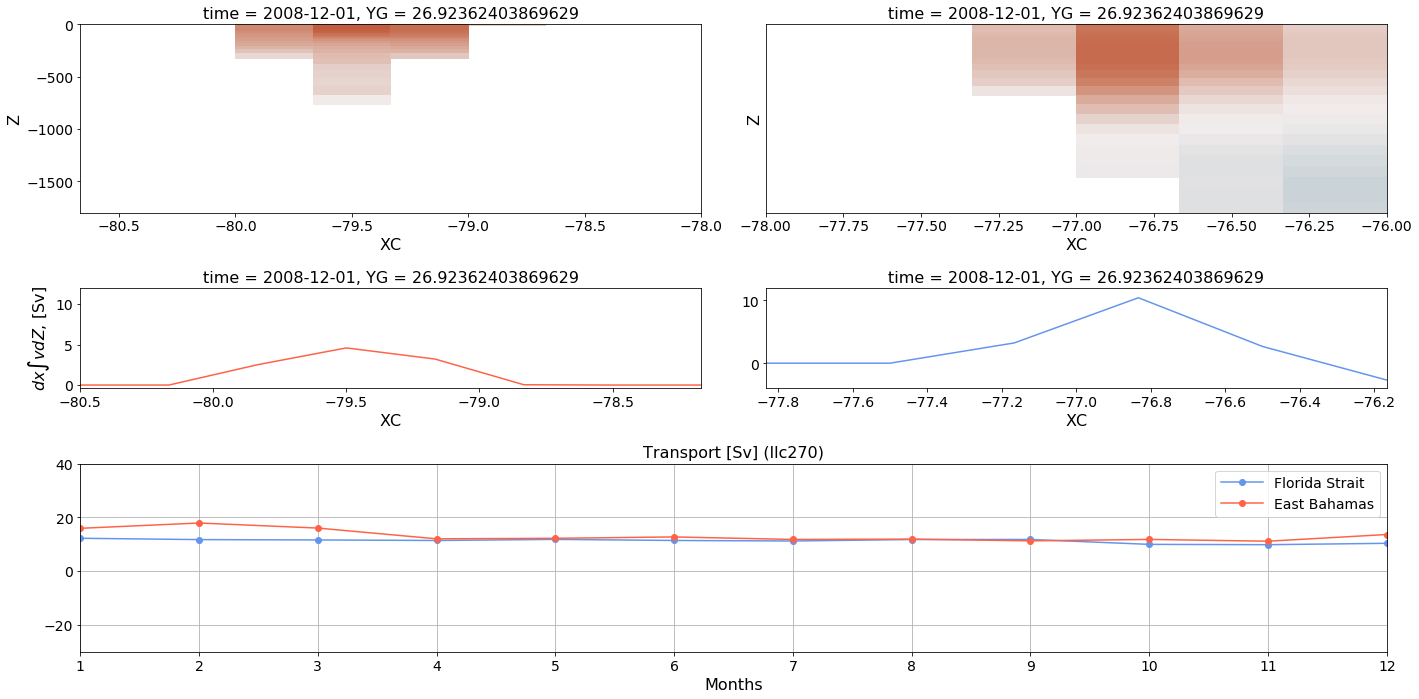

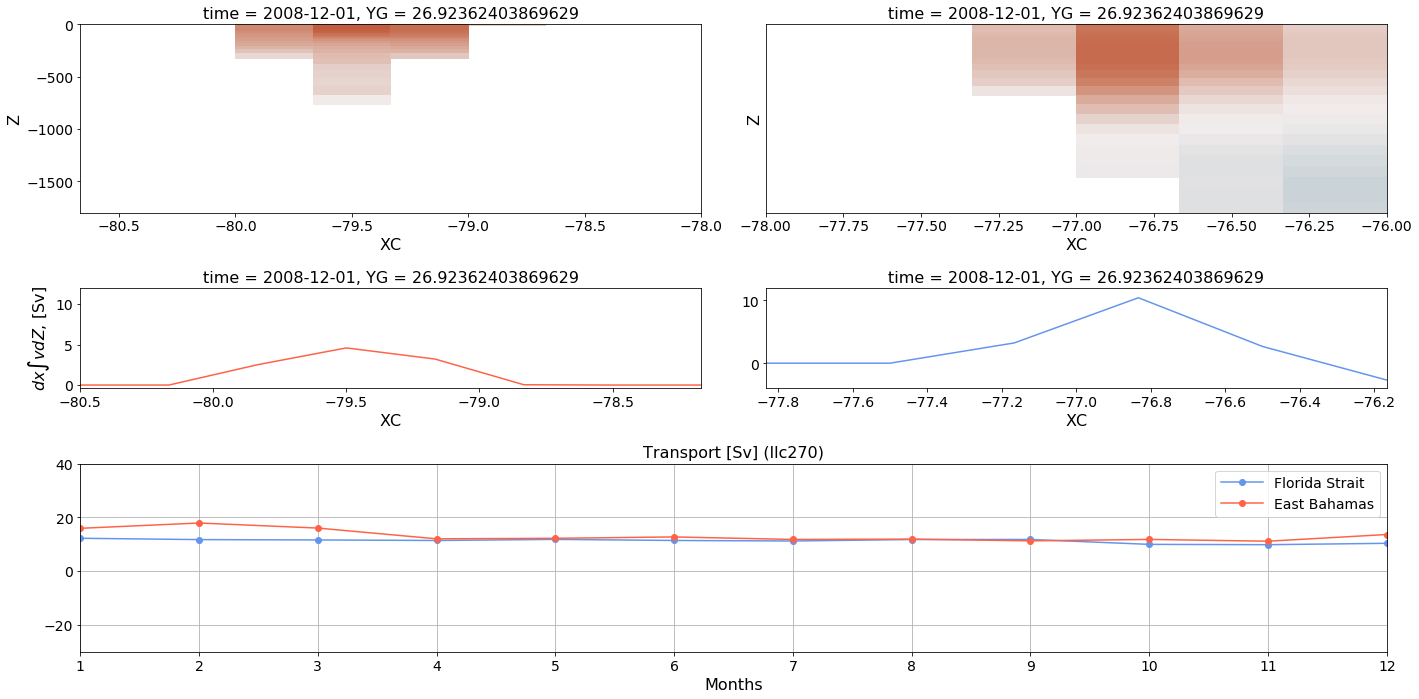

In [61]:
plt.figure(figsize=(20,10))
for i in range(len(time_m)):
    
    plt.subplot2grid((8,6),(0,0), colspan=3, rowspan=3)
    Vc_fs.isel(time=i).plot(vmin=-1,vmax=1, cmap=cmocean.cm.balance, add_colorbar=False)
    plt.ylim([-1800,1]);

    plt.subplot2grid((8,6),(0,3), colspan=3, rowspan=3)
    Vc_eb.isel(time=i).plot(vmin=-1,vmax=1, cmap=cmocean.cm.balance, add_colorbar=False)
    plt.ylim([-1800,1]);
    plt.yticks([])

    plt.subplot2grid((8,6),(3,0), colspan=3, rowspan=2)
    (Vc_fs_di*1e-6).isel(time=i).plot(color=color1)
    plt.ylabel(r'$dx \int v dZ$, [Sv]')
    plt.xlim([Vc_fs.XC.min(),Vc_fs.XC.max()])
    plt.ylim([-0.4,12])

    plt.subplot2grid((8,6),(3,3), colspan=3, rowspan=2)
    (Vc_eb_di*1e-6).isel(time=i).plot(color=color2)
    plt.xlim([Vc_eb.XC.min(),Vc_eb.XC.max()])
    plt.ylim([-4,12])


    plt.subplot2grid((8,6),(5,0), colspan=6, rowspan=3)
    plt.plot(time_m[:i+1], Vc_fs_i.values[:i+1], marker='o', color=color2, label='Florida Strait')
    plt.plot(time_m[:i+1], Vc_eb_i.values[:i+1], marker='o', color=color1, label='East Bahamas')

    plt.xlim([time_m.min(),time_m.max()])
    plt.xticks(time_m)
    plt.grid()
    plt.xlabel('Months')
    plt.title('Transport [Sv] (llc270)')
    plt.legend()
    plt.ylim([-30,40])
    plt.tight_layout()
    plt.savefig(figdir+'V_llc270_GS_2prongs_%06d'%i)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

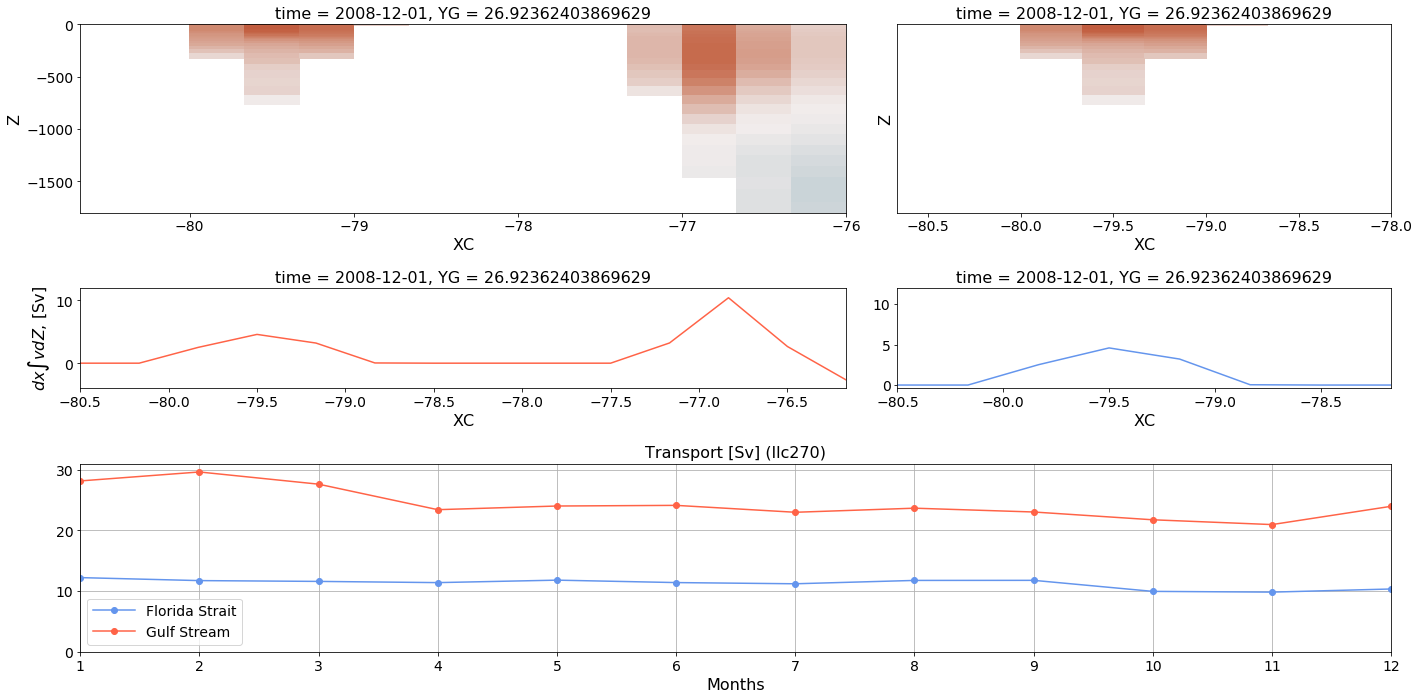

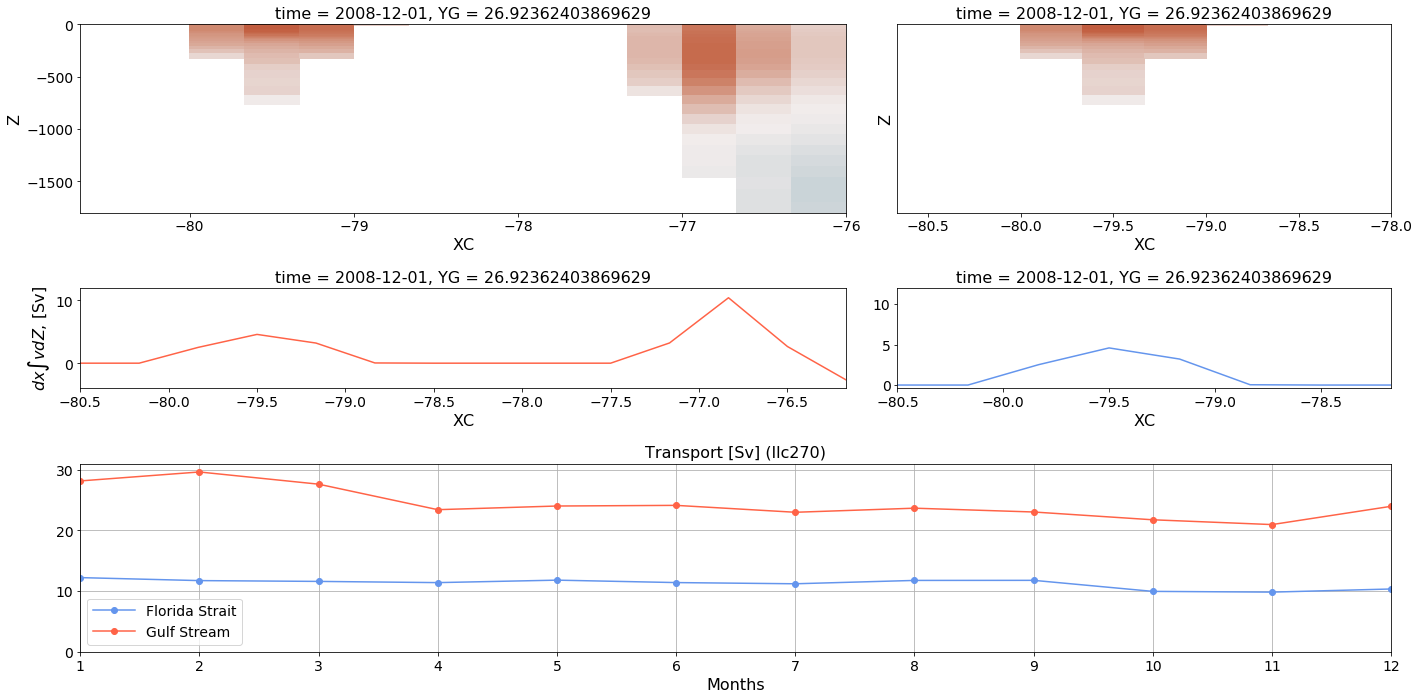

In [62]:
plt.figure(figsize=(20,10))
for i in range(len(time_m)):
    
    plt.subplot2grid((8,5),(0,0), colspan=3, rowspan=3)
    Vc_gs.isel(time=i).plot(vmin=-1,vmax=1, cmap=cmocean.cm.balance, add_colorbar=False)
    plt.ylim([-1800,1]);

    plt.subplot2grid((8,5),(0,3), colspan=2, rowspan=3)
    Vc_fs.isel(time=i).plot(vmin=-1,vmax=1, cmap=cmocean.cm.balance, add_colorbar=False)
    plt.ylim([-1800,1]);
    plt.yticks([])

    plt.subplot2grid((8,5),(3,0), colspan=3, rowspan=2)
    (Vc_gs_di*1e-6).isel(time=i).plot(color=color1)
    plt.ylabel(r'$dx \int v dZ$, [Sv]')
    plt.xlim([Vc_gs.XC.min(),Vc_gs.XC.max()])
    plt.ylim([-4,12])

    plt.subplot2grid((8,5),(3,3), colspan=2, rowspan=2)
    (Vc_fs_di*1e-6).isel(time=i).plot(color=color2)
    plt.xlim([Vc_fs.XC.min(),Vc_fs.XC.max()])
    plt.ylim([-0.4,12])


    plt.subplot2grid((8,5),(5,0), colspan=5, rowspan=3)
    plt.plot(time_m[:i+1], Vc_fs_i.values[:i+1], marker='o', color=color2, label='Florida Strait')
    plt.plot(time_m[:i+1], Vc_gs_i.values[:i+1], marker='o', color=color1, label='Gulf Stream')

    plt.xlim([time_m.min(),time_m.max()])
    plt.xticks(time_m)
    plt.grid()
    plt.xlabel('Months')
    plt.title('Transport [Sv] (llc270)')
    plt.legend()
    plt.ylim([0,31])
    plt.tight_layout()
    plt.savefig(figdir+'V_llc270_S_%06d'%i)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

In [27]:
Salt_wet = np.zeros_like(Salt_noland[:14])
Theta_wet = np.zeros_like(Salt_noland[:14])
U_wet = np.zeros_like(Salt_noland[:14])
V_wet = np.zeros_like(Salt_noland[:14])


Salt_wet[1:7] = Salt_noland[12:18]
Salt_wet[7:13] = Salt_noland[6:12]
Salt_wet[0] = Salt_noland[11]
Salt_wet[-1] = Salt_noland[12]

Theta_wet[1:7] = Theta_noland[12:18]
Theta_wet[7:13] = Theta_noland[6:12]
Theta_wet[0] = Theta_noland[11]
Theta_wet[-1] = Theta_noland[12]

U_wet[1:7] = U_noland[12:18]
U_wet[7:13] = U_noland[6:12]
U_wet[0] = U_noland[11]
U_wet[-1] = U_noland[12]

V_wet[1:7] = V_noland[12:18]
V_wet[7:13] = V_noland[6:12]
V_wet[0] = V_noland[11]
V_wet[-1] = V_noland[12]

In [28]:
# Salt_wet = Salt_noland
# Theta_wet = Theta_noland
# U_wet = U_noland
# V_wet = V_noland


In [29]:
%%time
Salt_noland_fh = np.zeros((Salt_wet.shape[0],z.shape[0],ds0.Depth.shape[0],ds0.Depth.shape[1]))
Theta_noland_fh = np.zeros((Salt_wet.shape[0],z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
U_noland_fh = np.zeros((Salt_wet.shape[0],z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
V_noland_fh = np.zeros((Salt_wet.shape[0],z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))

for i in range(Salt_wet.shape[0]):
    for j in range(Salt_wet.shape[1]):
 
        fSh = interp2d(xc,yc, Salt_noland[i,j], kind='linear')
        fTh = interp2d(xc,yc, Theta_noland[i,j], kind='linear')
        fUh = interp2d(xg,yc, U_noland[i,j], kind='linear')
        fVh = interp2d(xc,yg, V_noland[i,j], kind='linear')
    
        Salt_noland_fh[i,j] = fSh(xc_fine, yc_fine)
        Theta_noland_fh[i,j] = fTh(xc_fine, yc_fine)
        U_noland_fh[i,j] = fUh(xg_fine, yc_fine)
        V_noland_fh[i,j] = fVh(xc_fine, yg_fine)
    

CPU times: user 25.3 s, sys: 3.43 s, total: 28.7 s
Wall time: 28.7 s


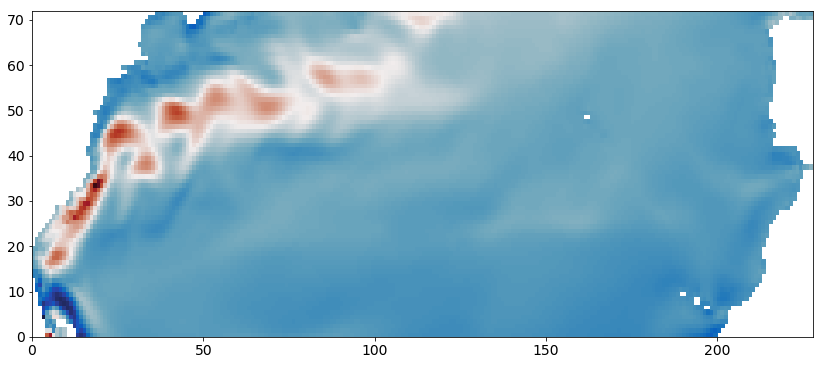

In [30]:
plt.pcolormesh(U[0,0], cmap=cmocean.cm.balance)

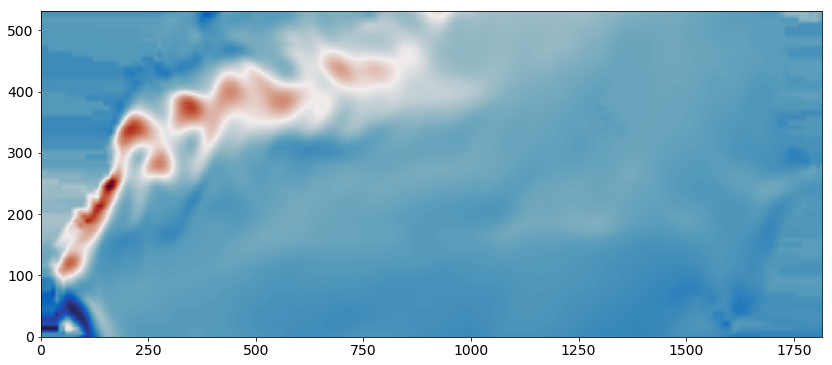

In [31]:
plt.pcolormesh(U_noland_fh[0,0], cmap=cmocean.cm.balance)

In [32]:
Salt_noland_fh[2,:,10].shape, Salt_noland_fh.shape, 

((50, 1815), (14, 50, 532, 1815))

In [33]:
%%time
Salt_noland_f = np.zeros((Salt_noland_fh.shape[0],z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
Theta_noland_f = np.zeros((Salt_noland_fh.shape[0],z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
U_noland_f = np.zeros((Salt_noland_fh.shape[0],z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
V_noland_f = np.zeros((Salt_noland_fh.shape[0],z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))

for i in range(Salt_noland_fh.shape[0]):
    for j in range(Salt_noland_fh.shape[2]):

        fS = interp2d(xc_fine,z, Salt_noland_fh[i,:,j], kind='linear')
        Salt_noland_f[i,:,j] = np.flipud(fS(xc_fine, z_fine))
    
        fT = interp2d(xc_fine,z, Theta_noland_fh[i,:,j], kind='linear')
        Theta_noland_f[i,:,j] = np.flipud(fT(xc_fine, z_fine))
    
        fU = interp2d(xg_fine,z, U_noland_fh[i,:,j], kind='linear')
        U_noland_f[i,:,j] = np.flipud(fU(xg_fine, z_fine))
    
        fV = interp2d(xc_fine,z, V_noland_fh[i,:,j], kind='linear')
        V_noland_f[i,:,j] = np.flipud(fV(xc_fine, z_fine))
    
    

CPU times: user 2min 18s, sys: 17.3 s, total: 2min 35s
Wall time: 2min 44s


In [39]:
times = ds_llc270.time.values[0:14]
times

array([420768, 423000, 425088, 427320, 429480, 431712, 433872, 436104,
       438336, 440496, 442728, 444888, 447120, 449352])

In [40]:
salt_noland_f = xr.DataArray(Salt_noland_f, 
                             coords={'time':times,
                                     'Z': z_fine,
                                     'YC': yc_fine, 
                                     'XC': xc_fine},
                             dims=['time','Z','YC','XC'])
theta_noland_f = xr.DataArray(Theta_noland_f, 
                              coords={'time':times,
                                     'Z': z_fine,
                                     'YC': yc_fine, 
                                     'XC': xc_fine},
                             dims=['time','Z','YC','XC'])
u_noland_f = xr.DataArray(U_noland_f, 
                          coords={'time':times,
                                  'Z': z_fine,
                                  'YC': yc_fine, 
                                  'XG': xg_fine}, 
                          dims=['time','Z','YC','XG'])
v_noland_f = xr.DataArray(V_noland_f, 
                          coords={'time':times,
                                  'Z': z_fine,
                                  'YG': yg_fine, 
                                  'XC': xc_fine}, 
                          dims=['time','Z','YG','XC'])

ds_f = xr.Dataset({'Salt_l': salt_noland_f,
                   'Theta_l': theta_noland_f,
                   'U_l': u_noland_f,
                   'V_l': v_noland_f})
ds_f

<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, time: 14)
Coordinates:
  * time     (time) int64 420768 423000 425088 427320 ... 444888 447120 449352
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC       (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG       (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l   (time, Z, YC, XC) float64 36.02 36.02 36.02 ... 34.87 34.87 34.87
    Theta_l  (time, Z, YC, XC) float64 26.23 26.23 26.23 ... 1.623 1.623 1.623
    U_l      (time, Z, YC, XG) float64 -0.02322 -0.02322 ... -0.000531 -0.000531
    V_l      (time, Z, YG, XC) float64 0.3962 0.3962 ... 0.000135 0.000135

In [41]:
salt = xr.DataArray(Salt[0], coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
theta = xr.DataArray(Theta[0], coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
u = xr.DataArray(U[0], coords={'Z': z,'YC': yc, 'XG': xg},
             dims=['Z','YC','XG'])
v = xr.DataArray(V[0], coords={'Z': z,'YG': yg, 'XC': xc},
             dims=['Z','YG','XC'])
salt_noland = xr.DataArray(Salt_noland[0], coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
theta_noland = xr.DataArray(Theta_noland[0], coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
u_noland = xr.DataArray(U_noland[0], coords={'Z': z,'YC': yc, 'XG': xg},
             dims=['Z','YC','XG'])
v_noland = xr.DataArray(V_noland[0], coords={'Z': z,'YG': yg, 'XC': xc},
             dims=['Z','YG','XC'])

dep = xr.DataArray(depth*-1, coords={'YC': yc, 'XC': xc}, dims=['YC','XC'])
dep_u = xr.DataArray(depth_u*-1, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dep_v = xr.DataArray(depth_v*-1, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])

dxC = xr.DataArray(dxc*-1, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dyG = xr.DataArray(dyg*-1, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dxG = xr.DataArray(dxg*-1, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])
dyC = xr.DataArray(dyc*-1, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])


ds_c = xr.Dataset({'salt': salt,
                   'theta': theta,
                   'U': u,
                   'V': v,
                   'salt_l': salt_noland,
                   'theta_l': theta_noland,
                   'U_l': u_noland,
                   'V_l': v_noland,
                   'depth': dep, 'depth_u': dep_u, 'depth_v': dep_v, 
                   'dxC' : dxC, 'dyC' : dyC, 'dxG' : dxG, 'dyG' : dyG,})
ds_c

<xarray.Dataset>
Dimensions:  (XC: 228, XG: 228, YC: 72, YG: 72, Z: 50)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * YC       (YC) float64 26.24 26.51 26.79 27.06 ... 43.3 43.53 43.75 43.97
  * XC       (XC) float64 -80.83 -80.5 -80.17 -79.83 ... -5.833 -5.5 -5.167
  * XG       (XG) float64 -81.0 -80.67 -80.33 -80.0 ... -6.0 -5.667 -5.333
  * YG       (YG) float64 26.38 26.65 26.92 27.2 ... 43.41 43.64 43.86 44.09
Data variables:
    salt     (Z, YC, XC) float64 nan nan nan 35.99 36.03 ... nan nan nan nan nan
    theta    (Z, YC, XC) float64 nan nan nan 26.28 26.42 ... nan nan nan nan nan
    U        (Z, YC, XG) float64 nan nan nan nan 0.3758 ... nan nan nan nan nan
    V        (Z, YG, XC) float64 nan nan nan 0.4376 0.5926 ... nan nan nan nan
    salt_l   (Z, YC, XC) float64 35.99 35.99 35.99 35.99 ... 34.87 34.87 34.87
    theta_l  (Z, YC, XC) float64 26.28 26.28 26.28 26.28 ... 1.622 1.622 1.622
    U_l      (Z, YC, XG) float64 0.3758 

In [43]:
depths = ['depth', 'depth_u', 'depth_v']
x0 = ['XC','XG','XC']
y0 = ['YC','YC','YG']
depths_c = {}
for it, v in enumerate(depths):
    
    depths_c[v] = nearest_c_to_f(ds_c[v].values, ds_c[x0[it]].values,ds_c[y0[it]].values,ds_f[x0[it]].values,ds_f[y0[it]].values)
    ds_f[v+'_c'] = xr.DataArray(depths_c[v], coords={y0[it] : ds_f[y0[it]].values, x0[it] : ds_f[x0[it]].values},
                          dims=[y0[it],x0[it]])

ds_f

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, time: 14)
Coordinates:
  * time       (time) int64 420768 423000 425088 427320 ... 444888 447120 449352
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (time, Z, YC, XC) float64 36.02 36.02 36.02 ... 34.87 34.87 34.87
    Theta_l    (time, Z, YC, XC) float64 26.23 26.23 26.23 ... 1.623 1.623 1.623
    U_l        (time, Z, YC, XG) float64 -0.02322 -0.02322 ... -0.000531
    V_l        (time, Z, YG, XC) float64 0.3962 0.3962 ... 0.000135 0.000135
    depth_c    (YC, XC) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
    depth_u_c  (YC, XG)

In [ ]:
f_u_f =  interp2d(xc_fine,yc_fine, ds0.Depth.values*-1, kind='linear')
depth_u_f = f_u_f(xg_fine, yc_fine)
f_v_f =  interp2d(xc_fine,yc_fine, ds0.Depth.values*-1, kind='linear')
depth_v_f = f_v_f(xc_fine, yg_fine)
ds_f['depth'] = xr.DataArray(ds0.Depth.values*-1, coords=ds_f.depth_c.coords, dims = ds_f.depth_c.dims)
ds_f['depth_u'] = xr.DataArray(depth_u_f, coords=ds_f.depth_u_c.coords, dims = ds_f.depth_u_c.dims)
ds_f['depth_v'] = xr.DataArray(depth_v_f, coords=ds_f.depth_v_c.coords, dims = ds_f.depth_v_c.dims)


In [44]:
ds_f['dxC'] = xr.DataArray(ds0.dxC.values, coords=ds_f.depth_u_c.coords, dims = ds_f.depth_u_c.dims)
ds_f['dyG'] = xr.DataArray(ds0.dyG.values, coords=ds_f.depth_u_c.coords, dims = ds_f.depth_u_c.dims)
ds_f['dxG'] = xr.DataArray(ds0.dxG.values, coords=ds_f.depth_v_c.coords, dims = ds_f.depth_v_c.dims)
ds_f['dyC'] = xr.DataArray(ds0.dyC.values, coords=ds_f.depth_v_c.coords, dims = ds_f.depth_v_c.dims)
ds_f['dZ'] = xr.DataArray(ds0.drF.values, coords={'Z':ds_f.Z.values}, dims = ['Z'])

In [45]:
ds_f

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, time: 14)
Coordinates:
  * time       (time) int64 420768 423000 425088 427320 ... 444888 447120 449352
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (time, Z, YC, XC) float64 36.02 36.02 36.02 ... 34.87 34.87 34.87
    Theta_l    (time, Z, YC, XC) float64 26.23 26.23 26.23 ... 1.623 1.623 1.623
    U_l        (time, Z, YC, XG) float64 -0.02322 -0.02322 ... -0.000531
    V_l        (time, Z, YG, XC) float64 0.3962 0.3962 ... 0.000135 0.000135
    depth_c    (YC, XC) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
    depth_u_c  (YC, XG)

In [46]:
hfacs = ['hFacC','hFacW','hFacS']
xs = ['XC','XG','XC']
ys = ['YC','YC','YG']
for i, h in enumerate(hfacs):
    ds_f[h] = xr.DataArray(ds0[h].values, 
                           coords={'Z':z_fine,
                                   ys[i] : ds_f[ys[i]].values, 
                                   xs[i] : ds_f[xs[i]].values,}, 
                           dims = ['Z', ys[i], xs[i]])
    

In [47]:
ds_f

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, time: 14)
Coordinates:
  * time       (time) int64 420768 423000 425088 427320 ... 444888 447120 449352
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (time, Z, YC, XC) float64 36.02 36.02 36.02 ... 34.87 34.87 34.87
    Theta_l    (time, Z, YC, XC) float64 26.23 26.23 26.23 ... 1.623 1.623 1.623
    U_l        (time, Z, YC, XG) float64 -0.02322 -0.02322 ... -0.000531
    V_l        (time, Z, YG, XC) float64 0.3962 0.3962 ... 0.000135 0.000135
    depth_c    (YC, XC) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
    depth_u_c  (YC, XG)

In [56]:
%%time
variables = ['Salt','Theta','U','V']
hFacs = ['hFacC','hFacC','hFacW','hFacS']
for i,v in enumerate(variables):
    ds_f[v] = ds_f[v+'_l'].where(ds_f[hFacs[i]])

CPU times: user 16.9 s, sys: 1min 18s, total: 1min 35s
Wall time: 4min 47s


In [49]:
ds_f

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, time: 14)
Coordinates:
  * time       (time) int64 420768 423000 425088 427320 ... 444888 447120 449352
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (time, Z, YC, XC) float64 36.02 36.02 36.02 ... 34.87 34.87 34.87
    Theta_l    (time, Z, YC, XC) float64 26.23 26.23 26.23 ... 1.623 1.623 1.623
    U_l        (time, Z, YC, XG) float64 -0.02322 -0.02322 ... -0.000531
    V_l        (time, Z, YG, XC) float64 0.3962 0.3962 ... 0.000135 0.000135
    depth_c    (YC, XC) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
    depth_u_c  (YC, XG)

In [51]:
outdir = '/central/groups/oceanphysics/anirban/interpolated_STUV_netcdf/'
ds_small = ds_f.isel(time=0)
ds_small

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100)
Coordinates:
    time       int64 420768
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (Z, YC, XC) float64 36.02 36.02 36.02 36.02 ... 34.87 34.87 34.87
    Theta_l    (Z, YC, XC) float64 26.23 26.23 26.23 26.23 ... 1.622 1.622 1.622
    U_l        (Z, YC, XG) float64 -0.02322 -0.02322 ... -0.0002985 -0.0002985
    V_l        (Z, YG, XC) float64 0.3962 0.3962 ... -0.0004052 -0.0004052
    depth_c    (YC, XC) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
    depth_u_c  (YC, XG) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
 

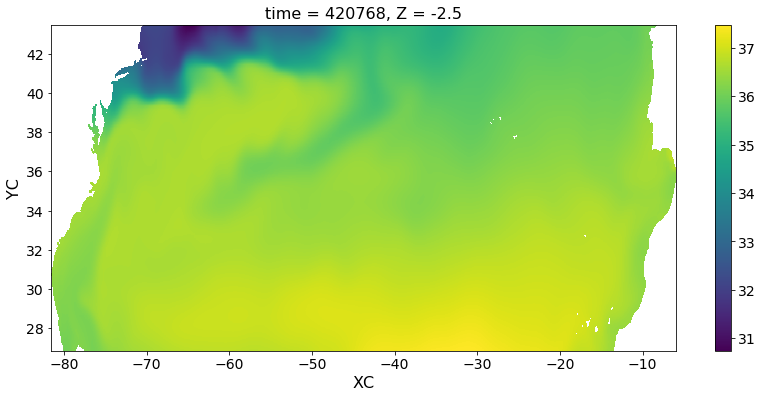

In [52]:
ds_small.Salt_l.where(ds_small.hFacC).isel(Z=0).plot()

In [47]:
ds_small.to_netcdf(outdir+'STUV_1815x532x100.%010d.nc' %(times[0]))

In [53]:
outdir = '/central/groups/oceanphysics/anirban/interpolated_STUV_netcdf/'
for i in range(len(ds_f.time)):
    ds_small = ds_f.isel(time=i)
    ds_small.to_netcdf(outdir+'STUV_interp_1815x532x100.%010d.nc' %(times[i]))

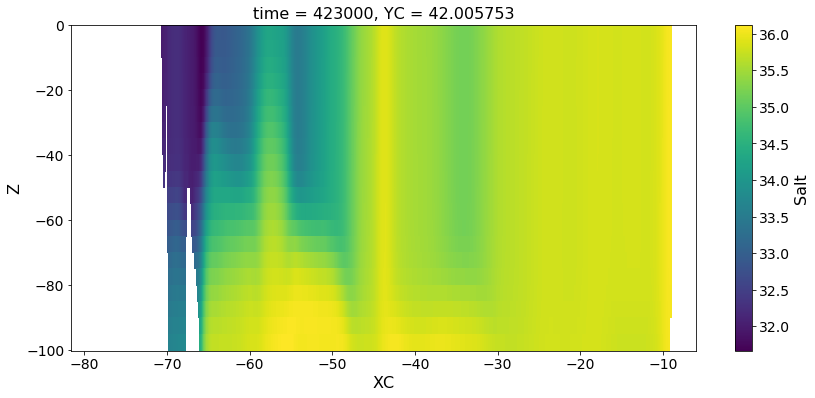

In [78]:
(ds_f.isel(time=0, Z=slice(0,20)).Salt.sel(YC=42, method='nearest')).plot()

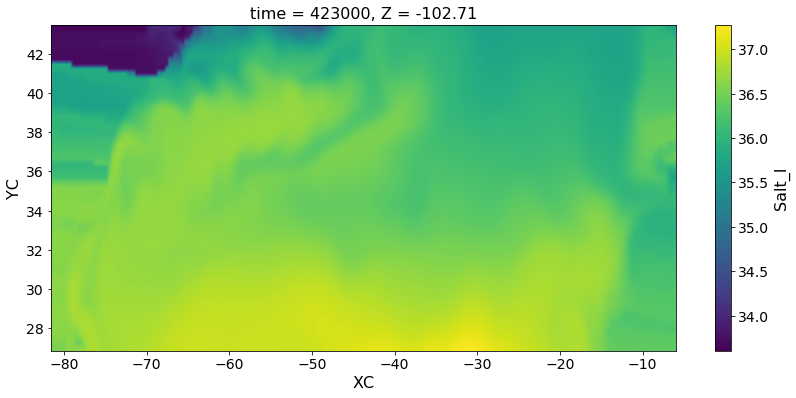

In [55]:
ds_f.Salt_l.isel(time=1,Z=20).plot()

In [97]:
def output_binary_file(data, fname, dtype=np.dtype('>f4')):
    data.astype(dtype).tofile(fname)

In [ ]:
ds_ac = ds_f.isel(time=slice(1,13))

In [69]:
ds_ac

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, time: 12)
Coordinates:
  * time       (time) int64 423000 425088 427320 429480 ... 442728 444888 447120
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (time, Z, YC, XC) float64 36.07 36.07 36.07 ... 34.87 34.87 34.87
    Theta_l    (time, Z, YC, XC) float64 25.26 25.26 25.26 ... 1.623 1.623 1.623
    U_l        (time, Z, YC, XG) float64 -0.03448 -0.03448 ... 0.0004072
    V_l        (time, Z, YG, XC) float64 0.3607 0.3607 ... 0.0007797 0.0007797
    depth_c    (YC, XC) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
    depth_u_c  (YC, X

In [ ]:
ds_ac.Salt.fillna(0)

In [99]:
var = {}
var['OBSs'] = ds_ac.isel(YC=1).Salt.values

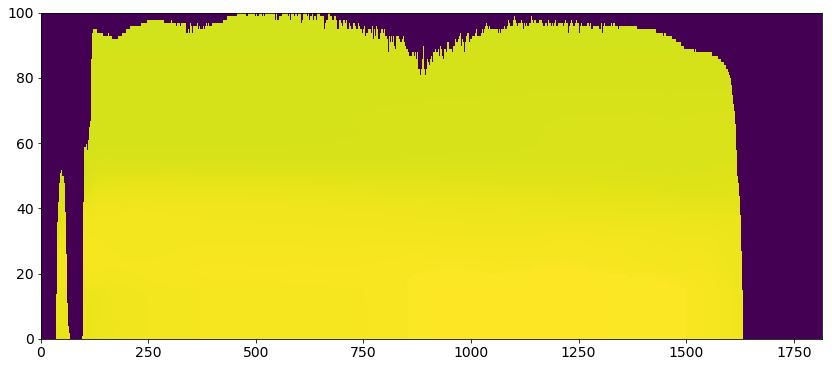

In [103]:
plt.pcolormesh(var['OBSs'][0])

In [104]:
var = {}
var['OBSs'] = ds_ac.isel(YC=1).Salt.values
var['OBNs'] = ds_ac.isel(YC=-2).Salt.values
var['OBSt'] = ds_ac.isel(YC=1).Theta.values
var['OBNt'] = ds_ac.isel(YC=-2).Theta.values
var['OBSu'] = ds_ac.isel(YC=1).U.values
var['OBNu'] = ds_ac.isel(YC=-2).U.values
var['OBSv'] = ds_ac.isel(YG=2).V.values
var['OBNv'] = ds_ac.isel(YG=-2).V.values
var['OBEs'] = ds_ac.isel(XC=-3).Salt.values
var['OBEt'] = ds_ac.isel(XC=-3).Theta.values
var['OBEu'] = ds_ac.isel(XG=-3).U.values
var['OBEv'] = ds_ac.isel(XC=-3).V.values


In [115]:
list(var.keys())

['OBSs',
 'OBNs',
 'OBSt',
 'OBNt',
 'OBSu',
 'OBNu',
 'OBSv',
 'OBNv',
 'OBEs',
 'OBEt',
 'OBEu',
 'OBEv']

In [118]:
for v in var.keys():
    var[v][np.isnan(var[v])] = 0

In [119]:
bcdir = '/central/groups/oceanphysics/anirban/hydrog_BC_IC_from_llc270/'

In [122]:
for v in var.keys():
    print(var[v].shape[-2])

100
100
100
100
100
100
100
100
100
100
100
100


In [124]:
for v in var.keys():
    output_binary_file(var[v], os.path.join(bcdir, v+'_%sx%sx%s.bin' %(var[v].shape[-1],var[v].shape[-2],var[v].shape[0])))

In [126]:
varin = {}
varin['S0'] = ds_ac.Salt.isel(time=0).values
varin['T0'] = ds_ac.Theta.isel(time=0).values
varin['U0'] = ds_ac.U.isel(time=0).values
varin['V0'] = ds_ac.V.isel(time=0).values
for v in varin.keys():
    varin[v][np.isnan(varin[v])] = 0

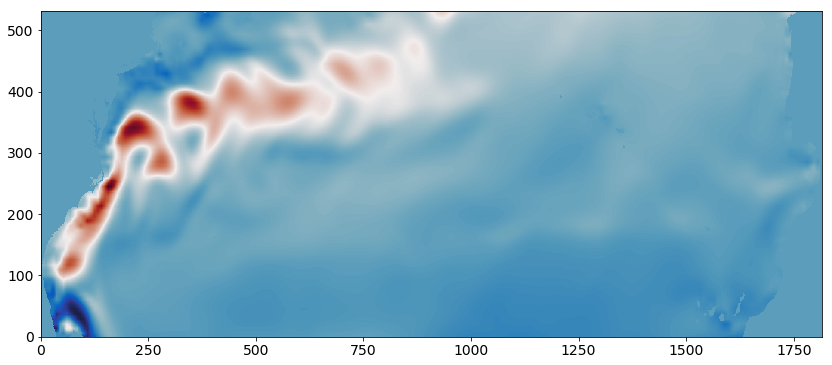

In [132]:
plt.pcolormesh(varin['U0'][0], cmap = cmocean.cm.balance)

In [133]:
varin['V0'].shape

(100, 532, 1815)

In [134]:
for v in varin.keys():
    output_binary_file(varin[v], os.path.join(bcdir, v+'_%sx%sx%s.bin' %(varin[v].shape[-1],varin[v].shape[-2],varin[v].shape[0])))

In [6]:
outdir = '/central/groups/oceanphysics/anirban/interpolated_STUV_netcdf/'


In [7]:
ds_read = xr.open_dataset(outdir+'STUV_interp_1815x532x100.0000423000.nc')
ds_read

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100)
Coordinates:
    time       int64 ...
  * Z          (Z) float32 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) float32 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) float32 -81.5625 -81.520836 ... -6.020836 -5.9791694
  * XG         (XG) float32 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) float32 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (Z, YC, XC) float64 ...
    Theta_l    (Z, YC, XC) float64 ...
    U_l        (Z, YC, XG) float64 ...
    V_l        (Z, YG, XC) float64 ...
    depth_c    (YC, XC) float64 ...
    depth_u_c  (YC, XG) float64 ...
    depth_v_c  (YG, XC) float64 ...
    dxC        (YC, XG) float32 ...
    dyG        (YC, XG) float32 ...
    dxG        (YG, XC) float32 ...
    dyC        (YG, XC) float32 ...
    dZ         (Z) float32 ...
    hFacC      (Z, YC, XC) float3

In [8]:
V = ds_read.V_l.where(ds_read.hFacS)

In [9]:
dirold = '/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/'

fSs = open(dirold+'OBSs_1815x100x26.bin', 'rb')
Ss = np.fromfile(fSs, '>f4')
Ss.shape = (26,100,1815)
Ssmasked = np.ma.masked_where(Ss==0, Ss)

fVs = open(dirold+'OBSv_1815x100x26.bin', 'rb')
Vs = np.fromfile(fVs, '>f4')
Vs.shape = (26,100,1815)
Vsmasked = np.ma.masked_where(Ss==0, Vs)



In [15]:
ds_S = ds_read.isel(YG=2, YC=2).drop('time')
ds_S

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, Z: 100)
Coordinates:
  * Z          (Z) float32 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
    YC         float32 26.9407
  * XC         (XC) float32 -81.5625 -81.520836 ... -6.020836 -5.9791694
  * XG         (XG) float32 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
    YG         float32 26.923624
Data variables:
    Salt_l     (Z, XC) float64 ...
    Theta_l    (Z, XC) float64 ...
    U_l        (Z, XG) float64 ...
    V_l        (Z, XC) float64 ...
    depth_c    (XC) float64 ...
    depth_u_c  (XG) float64 ...
    depth_v_c  (XC) float64 ...
    dxC        (XG) float32 ...
    dyG        (XG) float32 ...
    dxG        (XC) float32 ...
    dyC        (XC) float32 ...
    dZ         (Z) float32 ...
    hFacC      (Z, XC) float32 ...
    hFacW      (Z, XG) float32 ...
    hFacS      (Z, XC) float32 ...

In [17]:
ds_S['v_old'] = xr.DataArray(Vsmasked[0], coords=ds_S.V_l.coords, dims=ds_S.V_l.dims)
ds_S

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, Z: 100)
Coordinates:
  * Z          (Z) float32 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
    YC         float32 26.9407
  * XC         (XC) float32 -81.5625 -81.520836 ... -6.020836 -5.9791694
  * XG         (XG) float32 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
    YG         float32 26.923624
Data variables:
    Salt_l     (Z, XC) float64 ...
    Theta_l    (Z, XC) float64 ...
    U_l        (Z, XG) float64 ...
    V_l        (Z, XC) float64 ...
    depth_c    (XC) float64 ...
    depth_u_c  (XG) float64 ...
    depth_v_c  (XC) float64 ...
    dxC        (XG) float32 ...
    dyG        (XG) float32 ...
    dxG        (XC) float32 ...
    dyC        (XC) float32 ...
    dZ         (Z) float32 ...
    hFacC      (Z, XC) float32 ...
    hFacW      (Z, XG) float32 ...
    hFacS      (Z, XC) float32 ...
    v_old      (Z, XC) >f4 nan nan nan nan nan nan ... nan nan nan nan nan nan

In [38]:
ds0

NameError: name 'ds0' is not defined

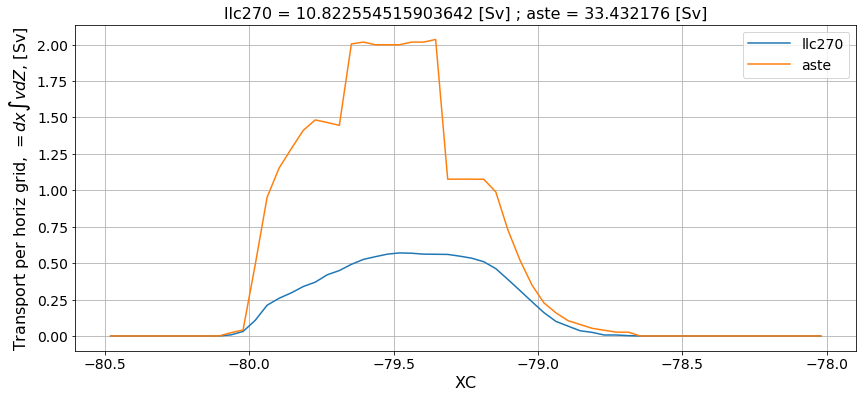

In [37]:
V_pg = (V.isel(YG=2).sel(XC=slice(-80.5,-78)) * ds_read.dxG.isel(YG=2).sel(XC=slice(-80.5,-78)) * ds_read.sel(XC=slice(-80.5,-78)).dZ).sum(dim='Z')
V_pg_old = (ds_S.v_old.sel(XC=slice(-80.5,-78)) * ds_read.dxG.isel(YG=2).sel(XC=slice(-80.5,-78)) * ds_read.sel(XC=slice(-80.5,-78)).dZ).sum(dim='Z')
(V_pg/1e6).plot(label='llc270')
(V_pg_old/1e6).plot(label='aste')
plt.ylabel(r'Transport per horiz grid, $= dx \int v dZ$, [Sv]')
plt.title('llc270 = %s [Sv] ; aste = %s [Sv]' %(V_pg.sum().values/1e6 , V_pg_old.sum().values/1e6))
plt.legend()
plt.grid()

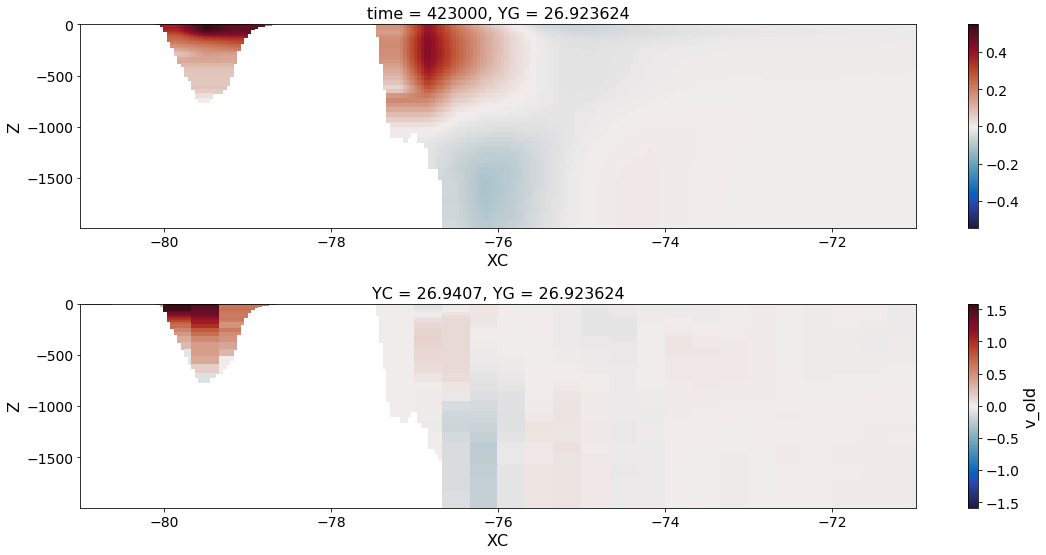

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(211)
V.isel(YG=2).sel(XC=slice(-81,-71), Z=slice(0,-2000)).plot(cmap=cmocean.cm.balance)
plt.subplot(212)
ds_S.v_old.sel(XC=slice(-81,-71), Z=slice(0,-2000)).plot(cmap=cmocean.cm.balance)
plt.tight_layout()

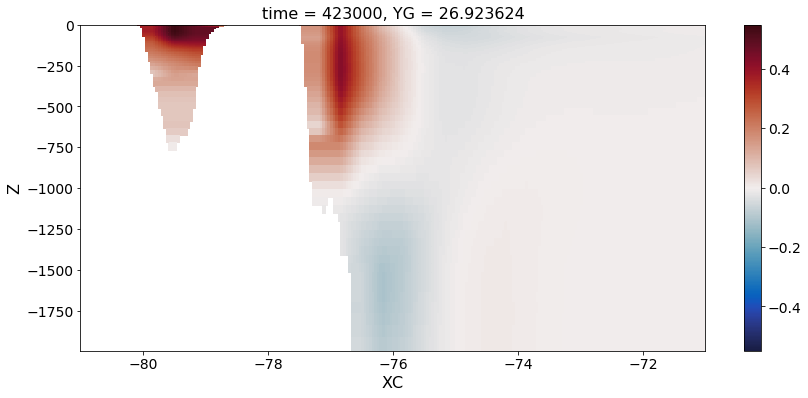

In [24]:
V.isel(YG=2).sel(XC=slice(-81,-71), Z=slice(0,-2000)).plot(cmap=cmocean.cm.balance)

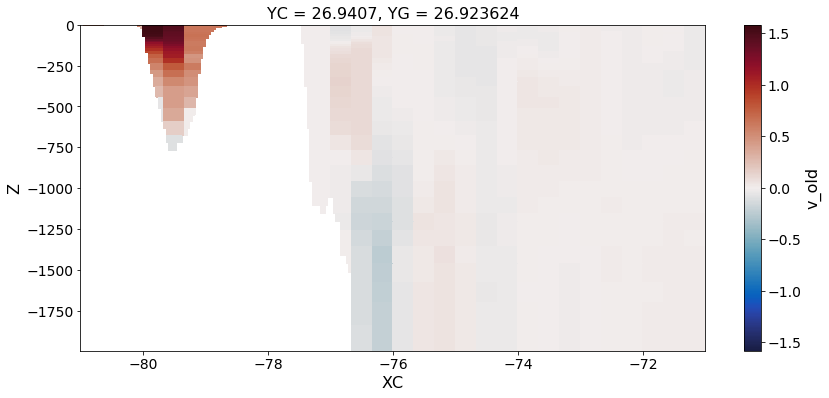

In [25]:
ds_S.v_old.sel(XC=slice(-81,-71), Z=slice(0,-2000)).plot(cmap=cmocean.cm.balance)

Text(0.5,1,'Our Model, YG=26.923624 , Net transport = 14.630372434332857 Sv')

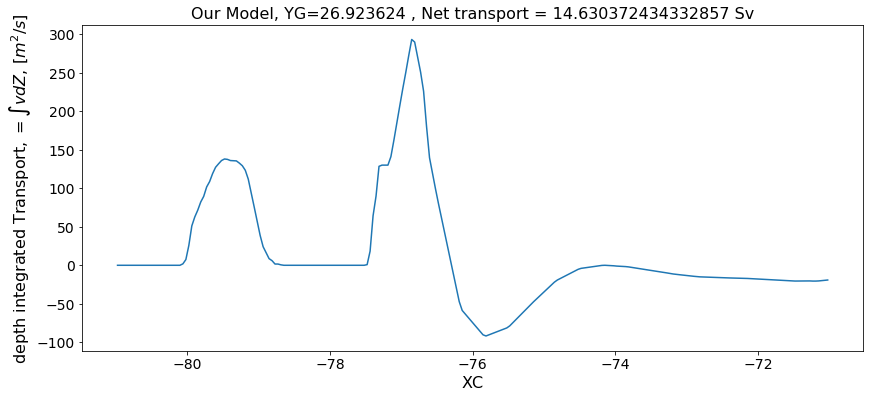

In [30]:
V_di_fine = (V.isel(YG=2).sel(XC=slice(-81,-71)) * ds_read.sel(XC=slice(-81,-71)).dZ).sum(dim='Z')
(V_di_fine).plot()
plt.ylabel(r'depth integrated Transport, $= \int v dZ$, [$m^2/s$]')
plt.title('Our Model, YG=%s , Net transport = %s Sv' %(V_pg_fine.YG.values , V_pg_fine.sum().values/1e6))

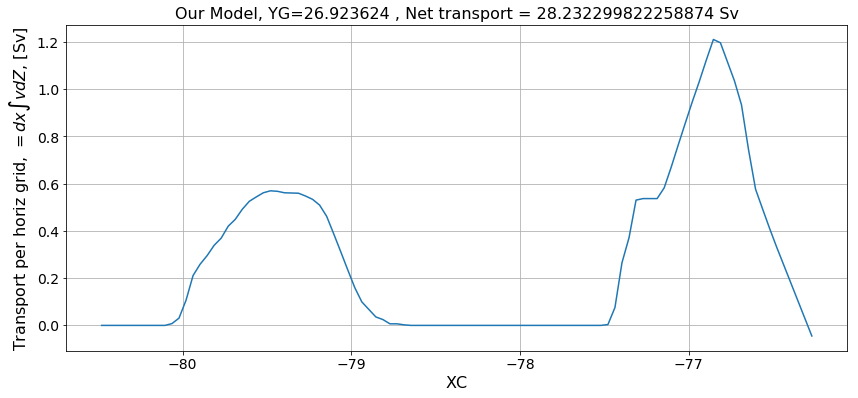

In [36]:
V_pg_fine = (V.isel(YG=2).sel(XC=slice(-80.5,-76.25)) * ds_read.dxG.isel(YG=2).sel(XC=slice(-80.5,-76.25)) * ds_read.sel(XC=slice(-80.5,-76.25)).dZ).sum(dim='Z')
(V_pg_fine/1e6).plot()
plt.ylabel(r'Transport per horiz grid, $= dx \int v dZ$, [Sv]')
plt.title('Our Model, YG=%s , Net transport = %s Sv' %(V_pg_fine.YG.values , V_pg_fine.sum().values/1e6))
plt.grid()

Text(0.5,1,'Our Model, YG=26.923624 , Net transport = 14.630372434332857 Sv')

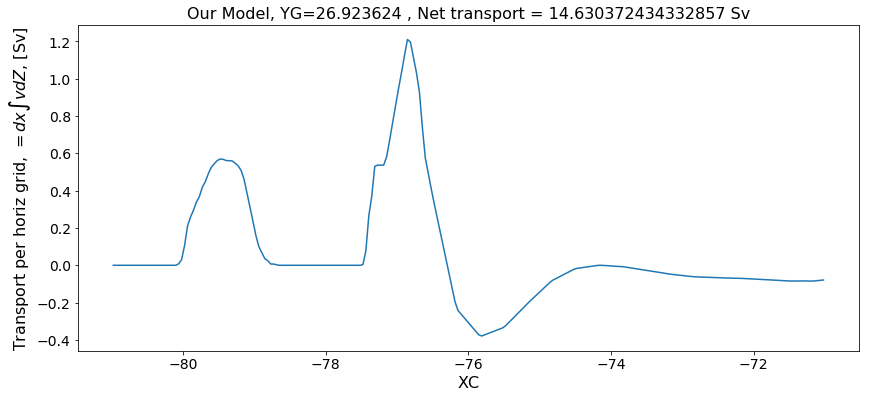

In [25]:
V_pg_fine = (V.isel(YG=2).sel(XC=slice(-81,-71)) * ds_read.dxG.isel(YG=2).sel(XC=slice(-81,-71)) * ds_read.sel(XC=slice(-81,-71)).dZ).sum(dim='Z')
(V_pg_fine/1e6).plot()
plt.ylabel(r'Transport per horiz grid, $= dx \int v dZ$, [Sv]')
plt.title('Our Model, YG=%s , Net transport = %s Sv' %(V_pg_fine.YG.values , V_pg_fine.sum().values/1e6))

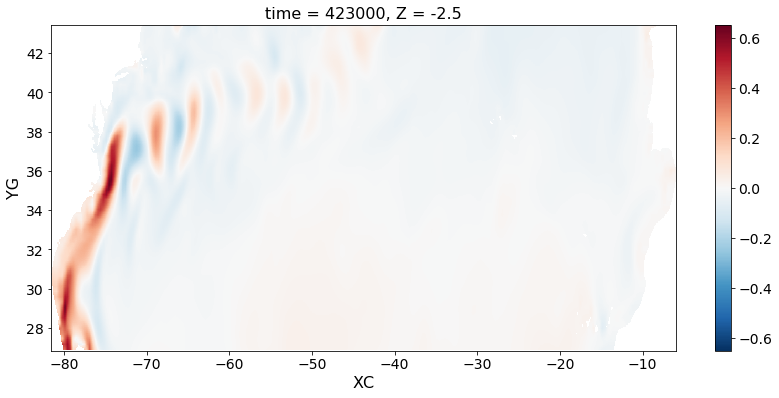

In [27]:
V.isel(Z=0).plot()

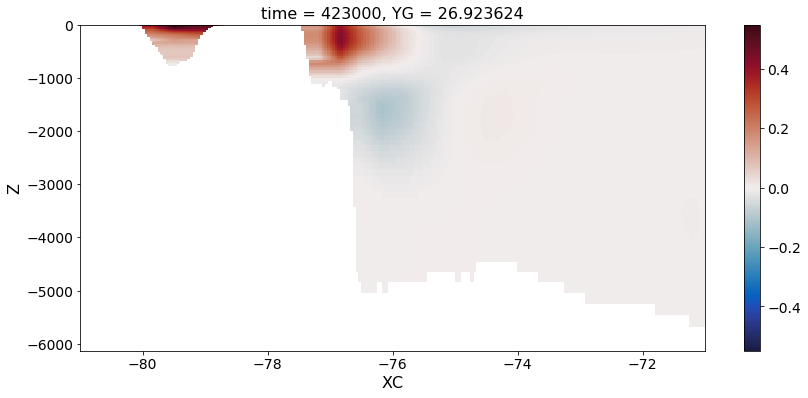

In [28]:
V.isel(YG=2).sel(XC=slice(-81,-71)).plot(cmap=cmocean.cm.balance)